In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

/home/jellouli/.conda/envs/data_distill/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from fed_distill.deep_inv import JensonShannonDiv, DeepInversionLoss, DeepInversion, ResnetCifarDeepInversion
from resnet_cifar import ResNet18

## DeepInversion test

In [5]:
bs = 256
lr = 0.1
l2_scale = 0.0
var_scale = 1e-3
batch_size = 250
bn_scale = 10

In [4]:
from fed_distill.deep_inv import RandomSampler
sampler = RandomSampler(batch_size=bs)

NameError: name 'bs' is not defined

In [8]:
teacher = ResNet18()
teacher.load_state_dict(torch.load('../model_weights/final_state_resnet.tar')['best_model'])

<All keys matched successfully>

In [9]:
from fed_distill.cifar10 import prepare_to_visualize
import matplotlib.pyplot as plt

In [11]:
res_inv = ResnetCifarDeepInversion(teacher_net=teacher,
                                    class_sampler=sampler,
                                    input_shape=(32,32),
                                    adam_lr = lr,
                                    l2_scale=l2_scale,
                                    var_scale=var_scale,
                                    bn_scale=bn_scale,
                                    batch_size=bs,
                                    grad_updates_batch=2000)

In [12]:
images, targets, losses = res_inv.compute_batch(get_losses=True)

100%|██████████| 2000/2000 [10:24<00:00,  3.20it/s]


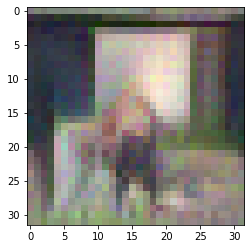

In [31]:
plt.imshow(prepare_to_visualize(images[12]))

In [14]:
targets[0]

tensor(2, device='cuda:0')

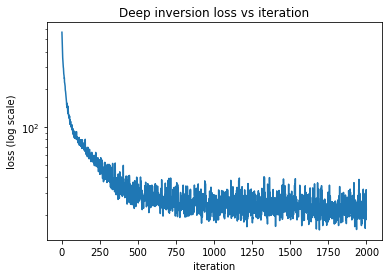

In [25]:
plt.plot(losses)
plt.yscale('log')
plt.title('Deep inversion loss vs iteration')
plt.xlabel('iteration')
plt.ylabel('loss (log scale)')
# plt.show()
plt.savefig('losses.jpg')


In [3]:
from fed_distill.deep_inv.student import ResnetCifarStudentTrainer
from fed_distill.deep_inv import RandomSampler

/home/jellouli/.conda/envs/data_distill/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
batch_size = 50
sampler = RandomSampler(batch_size=batch_size)
teacher = ResNet18()
teacher.load_state_dict(torch.load('../model_weights/final_state_resnet.tar')['best_model'])

NameError: name 'torch' is not defined

teacher_net: nn.Module,
        class_sampler: TargetSampler,
        num_initial_batches: int = 50,
        data_root: str = ".",
        adam_lr: float = 0.1,
        l2_scale: float = 0.0,
        var_scale: float = 1e-3,
        bn_scale: float = 10,
        comp_scale: float = 10,
        batch_size: int = 256,
        grad_updates_batch: int = 1000,
        test_batch_size: int = 4098,
        training_epochs: int = 250,
        epoch_gradient_updates: int = 195,
        device: str = "cuda",
        save_prefix: str = "",
        save_images: bool = False,
        imgs_save_folder: str = ".",
        save_state: bool = False,
        save_folder: str = ".",
        save_every: int = None,

In [ ]:
import logging
import sys
logger = logging.getLogger('fed_distill')
logger.setLevel(logging.INFO)
handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

In [5]:
trainer = ResnetCifarStudentTrainer(teacher_net=teacher,
                                    class_sampler=sampler, 
                                    num_initial_batches=1, 
                                    data_root='/mlodata1/jellouli', 
                                    batch_size=50, 
                                    grad_updates_batch=100, 
                                    training_epochs=2,
                                    epoch_gradient_updates=100, 
                                    save_prefix='test1', 
                                    save_images=True,
                                    imgs_save_folder='./test_run/images',
                                    save_state=True,
                                    save_folder='./test_run/states',
                                    save_every=1,
                                    )

NameError: name 'teacher' is not defined

In [6]:
trainer.train()

NameError: name 'trainer' is not defined